In [3]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import pandas as pd

import scipy as sp
import sklearn as sk
import math

In [43]:
#Opens CSV output file from the classic Vicsek simulation. Saves and prints relevant parameter information
#Note that output from the simulation should be redirected to file named 'output.csv'

f = open('output.csv', 'r')
num_agents = int(f.readline().strip())
board_size = int(f.readline().strip())
iterations = int(f.readline().strip())
eta = float(f.readline().strip())
f.close()
print("Number of agents: " + str(num_agents))
print("Boardsize: " + str(board_size))
print("Iterations: " + str(iterations))
print("Eta (noise): "  + str(eta))

Number of agents: 10000
Boardsize: 100
Iterations: 1000
Eta (noise): 0.25


In [44]:
#Stores CSV output in an iterable panda dataframe

df = pd.read_csv('output.csv', header = None, skiprows=4)
reader = pd.read_csv('output.csv', header = None, chunksize=num_agents, skiprows=4)
df.head()

,0,1,2,3,4
0,63.660155,36.222518,-0.537491,-0.843269,0.005763
1,86.451769,94.879378,-0.993994,0.109438,0.005763
2,6.454648,83.271854,0.496314,-0.868143,0.005763
3,28.033103,52.365509,-0.856798,0.515652,0.005763
4,14.509856,67.151511,0.124890,-0.992171,0.005763


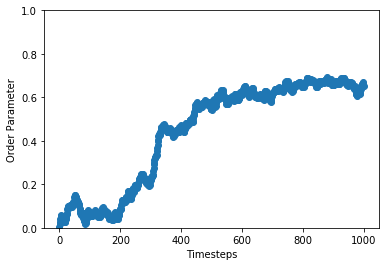

In [45]:
#Create a plot of global order over time

name = "%d_%d_%d_%f.png" % (num_agents, board_size, iterations, eta)
%matplotlib inline
x = [i for i in range(iterations)]
y = [df[4].iloc[i * num_agents] for i in range(iterations)]
plt.scatter(x, y)
plt.xlabel('Timesteps')
plt.ylabel('Order Parameter')
plt.ylim(0, 1) 
plt.show()

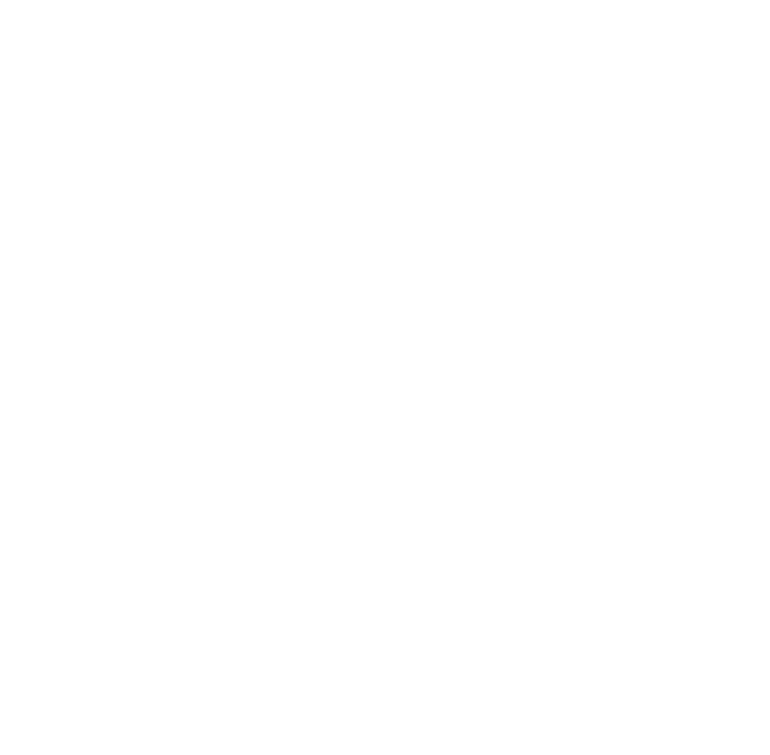

In [39]:
#Set up moviewriter
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='Movie Test', artist='Matplotlib',
                comment='Movie support!')
writer = FFMpegWriter(fps=15, metadata=metadata)


fig = plt.figure(figsize=(10,10), frameon=False)

ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')

#markersize varies the size of the dots in the simulation
l, = plt.plot([], [], 'k.', markersize=5)

plt.xlim(0, board_size)
plt.ylim(0, board_size)

x0, y0 = np.zeros((num_agents, 1)), np.zeros((num_agents, 1))

In [40]:
#Create video of classic Vicsek model and save it to current directory
name = "%d_%d_%d_%f.mp4" % (num_agents, board_size, iterations, eta)
with writer.saving(fig, name, 200):
    for chunk in reader:
        #plt.quiver(chunk[0].values, chunk[1].values, chunk[2].values, chunk[3].values)
        x0 = chunk[0].values
        y0 = chunk[1].values
        l.set_data(x0, y0)
        writer.grab_frame()

In [ ]:
#Script for creating a video with vectors denoting particle direction - slow and inefficient
import os, sys
i = 0
for chunk in reader:
    plt.figure(figsize=(12,8))
    plt.ylim(0,board_size)
    plt.xlim(0,board_size)
    plt.axis('off')
    plt.quiver(chunk[0].values, chunk[1].values, chunk[2].values, chunk[3].values)
    fname = '_tmp%05d.png'%i
    plt.savefig(fname)
    plt.clf()
    i += 1

os.system("ffmpeg -framerate 10 -i _tmp%05d.png movie.mp4")
os.system("rm _tmp*.png")